# A Machine Learning Approach to Predict the Price of Used Cars and Introduce a Recommender System


## Table of Contents
1. [Problem statement](#1-Problem-statement)
2. [Data collection and overview](#2-Data-collection-and-overview)
   - [2.1 Data Overview](#2.1-Data-Overview)
   - [2.2 Import libraries](#2.2-Import-libraries)
   - [2.3 Import dataset](#2.3-Import-dataset)
3. [Exploratory Data Analysis](#3-exploratory-data-analysis)
   - [3.1 Inspect Null Values](#3.1-Inspect-Null-Values)
   - [3.2 Detect Outliers](#3.2-Detect-Outliers)
   - [3.3 Univariate Analysis](#3.3-Univariate-Analysis)
      - [3.3.1 Price (Target Variable)](#3.3.1-Price-(Target-Variable))
      - [3.3.2 Year Variable](#3.3.2-Year-Variable)
      - [3.3.3 Odometer Variable](#3.3.3-Odometer-Variable)
   - [3.4 Multivariate Analysis](#3.4-Multivariate-Analysis)
4. [Feature Selection and Engineering](#4-Feature-Selection-and-Engineering)
5. [Modelling](#5-modelling)
   - [5.1 Split the dataset](#5.1-Split-the-data)
   - [5.2 Data preprocessing](#5.2-Data-Preprocessing)
      - [5.2.1 Imputation of missing values in numerical variables](#5.2.1-Imputation-of-missing-values-in-numerical-variables)
      - [5.2.2 Imputation of missing values in categorical variables](#5.2.1-Imputation-of-missing-values-in-categorical-variables)
      - [5.2.3 Engineering of outliers in numerical variables](#5.2.3-Engineering-outliers-in-numerical-variables)
   - [5.3 Standardization and Encoding](#5.3-Standardization-and-Encoding)
   - [5.4 Models](#5.4-Models)
   - [5.6 HyperParameter tuning](#5.6-HyperParameter-tuning)
6. [Conclusion](#6-Conclusion)
7. [Save the model](#7-Save-the-model)
8. [References](#8-References)


## 1. Problem statement

The used car market has been growing rapidly in recent years, driven by several key factors: new car prices depreciate quickly, vehicles today are built to last longer, and many people are looking for more affordable options due to economic conditions. Because of this, determining the right price for a used car has become more complicated. The value of a car can be influenced by many things like its mileage, age, brand, model, and other features. As a result, it's often challenging for both buyers and sellers to agree on what a fair price should be.

Many buyers and sellers still rely on rough estimates or outdated price guides, which don’t always reflect current market trends. This gap creates a lot of uncertainty, making it hard for buyers to find the best deals and for sellers to set competitive prices. What’s missing is an intelligent tool that can analyze all these variables and provide reliable price predictions, along with personalized recommendations based on the buyer’s preferences and budget.

This project aims to address these issues by building a system that uses advanced machine learning models (such as Linear Regression, XGBoost, Random Forest and K nearest regressor) to predict the fair value of a used car. In addition, we’ll create a recommendation system to help users find the best options based on their needs. Ultimately, the goal is to make the used car buying and selling process smoother, more transparent, and better informed for everyone involved.

## 2. Data collection and overview

This project will be using the “vehicle.csv” dataset,
 https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data , 
which is a dataset of used cars available on Kaggle Website, scrapped and compiled into a single file by Austin Reese. This data includes all relevant information that Craigslist provides on car sales in the United States such as Car price, condition, manufacturer, latitude/longitude and 22 other categories. Craigslist is the world’s largest collection of used vehicles for sale, yet it’s very difficult to collect all of them in the same place, so it is scrapped every few months by the data contributor. 
The “vehicle.csv” is a large dataset that consist of a total of 26 features and 426880 entries, with features of different datatypes like Integer, Float and Object.
Total number of Integer Columns: 2
Total number of float columns: 5
Total Number of Object Columns: 19


### 2.1 Data Overview

The dataset is a structured tabular data containing 426,880 entries and 26 columns. It represents detailed information about used car listings, including various features such as the car's manufacturer, model, price, year, and condition. The data has a mix of numerical (e.g., price, odometer), categorical (e.g., manufacturer, fuel, transmission), and textual attributes (e.g., description). While most columns are fully populated, several features such as condition, cylinders, and drive have significant missing values. It also includes geospatial data (lat, long) for car location and timestamp information (posting_date). Following are the list of all the features of the dataset and a brief desciption.

- id: Unique identifier for each car listing.
- url: Link to the detailed car listing webpage.
- region: Geographic region where the car is listed.
- region_url: URL of the region-specific webpage for car listings.
- price: Listed price of the car in USD.
- year: Manufacturing year of the car.
- manufacturer: Car brand or manufacturer (e.g., Ford, Toyota).
- model: Specific car model.
- condition: Describes the physical condition of the car (e.g., new, good, fair).
- cylinders: Number of engine cylinders (e.g., 4, 6, 8).
- fuel: Type of fuel used (e.g., gas, diesel, electric).
- odometer: Total distance traveled by the car in miles.
- title_status: Legal status of the car's title (e.g., clean, salvage).
- transmission: Type of car transmission (e.g., manual, automatic).
- VIN: Vehicle Identification Number, a unique identifier for the vehicle.
- drive: Type of drivetrain (e.g., FWD, RWD, AWD).
- size: Size category of the car (e.g., compact, mid-size).
- type: Car type or body style (e.g., sedan, SUV, truck).
- paint_color: Color of the car’s exterior paint.
- image_url: Link to the car’s image.
- description: Text description provided by the seller about the car.
- county: County where the car is located.
- state: U.S. state where the car is listed.
- lat: Latitude coordinate of the car’s location.
- long: Longitude coordinate of the car’s location.
- posting_date: Date when the listing was posted.

### 2.2 Import libraries

In [21]:
#import libraires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.gridspec as gridspec
from mpl_toolkits import mplot3d

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import ast
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
import joblib
import warnings


### 2.3 Import dataset

In [22]:
df=pd.read_csv("vehicles_data/vehicles.csv")

In [23]:
df["type"].unique()

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [24]:
df["cylinders"].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

## 3. Exploratory Data Analysis

In [25]:
#printing first three observations

print(df.head(3))

           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   

         region                       region_url  price  year manufacturer  \
0      prescott  https://prescott.craigslist.org   6000   NaN          NaN   
1  fayetteville     https://fayar.craigslist.org  11900   NaN          NaN   
2  florida keys      https://keys.craigslist.org  21000   NaN          NaN   

  model condition cylinders  ... size  type paint_color image_url description  \
0   NaN       NaN       NaN  ...  NaN   NaN         NaN       NaN         NaN   
1   NaN       NaN       NaN  ...  NaN   NaN         NaN       NaN         NaN   
2   NaN       NaN       NaN  ...  NaN   NaN         NaN       NaN         NaN   

  county state lat long posting_date  
0    NaN    az NaN  NaN          NaN  
1    NaN   

In [26]:
#checking the columns in the dataset

df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [27]:
# checking the info of the dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [28]:
#describing the data

print(df.describe)

<bound method NDFrame.describe of                 id                                                url  \
0       7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1       7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2       7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3       7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4       7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
...            ...                                                ...   
426875  7301591192  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426876  7301591187  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426877  7301591147  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426878  7301591140  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426879  7301591129  https://wyoming.craigslist.org/ctd/d/atlanta-2...   

                        region                         region_url  price  \
0            

In [29]:
#checking the numerical and categorical variables

num_features=df.select_dtypes(include="number").columns
cat_features=df.select_dtypes(exclude="number").columns

print(num_features)
print(cat_features)

Index(['id', 'price', 'year', 'odometer', 'county', 'lat', 'long'], dtype='object')
Index(['url', 'region', 'region_url', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive',
       'size', 'type', 'paint_color', 'image_url', 'description', 'state',
       'posting_date'],
      dtype='object')


The given output separates the features into two distinct groups. The first group includes core numerical attributes (id, price, year, odometer, county, lat, long), which primarily represent key identifiers and quantitative characteristics of the vehicles, along with geospatial information (lat, long). The second group consists of categorical and descriptive attributes (url, region, region_url, manufacturer, model, condition, etc.) that provide detailed metadata and qualitative descriptions for each listing.

In [30]:
# Define the function to check the 10 times rule
def check10timesrule(df):
    # Count the number of features (columns)
    num_features = len(df.columns)
    # Count the number of samples (rows)
    num_samples = len(df)
    # Calculate the ratio
    ratio = num_samples / num_features
    # Check if the ratio meets the 10 times rule
    if ratio >= 10:
        return True, ratio
    else:
        return False, ratio

# Run the check on the uploaded dataset
passed, ratio = check10timesrule(df)

# Display the result
print(f"Does the dataset meet the 10 times rule? {'Yes' if passed else 'No'}")
print(f"Sample-to-feature ratio: {ratio:.2f}")

Does the dataset meet the 10 times rule? Yes
Sample-to-feature ratio: 16418.46


The check10timesrule function is designed to implement the 10 times rule to determine if a dataset has a sufficient number of samples relative to the number of features. This rule is a common guideline used to ensure that the dataset has enough observations to provide reliable statistical results when building machine learning models.

### 3.1 Inspect Null Values

In [31]:
#checking for null values

print(df.isna().sum())

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


The dataset contains varying levels of missing values across multiple features, indicating data quality issues that need to be addressed. Some key columns like condition, cylinders, and VIN have a significant amount of missing data, with over 40% null values, which could impact the reliability of predictions. Additionally, attributes such as drive, size, and type also display a high proportion of null values. Notably, the county feature is completely missing for all entries, while year, fuel, and odometer have relatively low missing values. Addressing these missing values will be crucial for building robust models and ensuring data integrity.

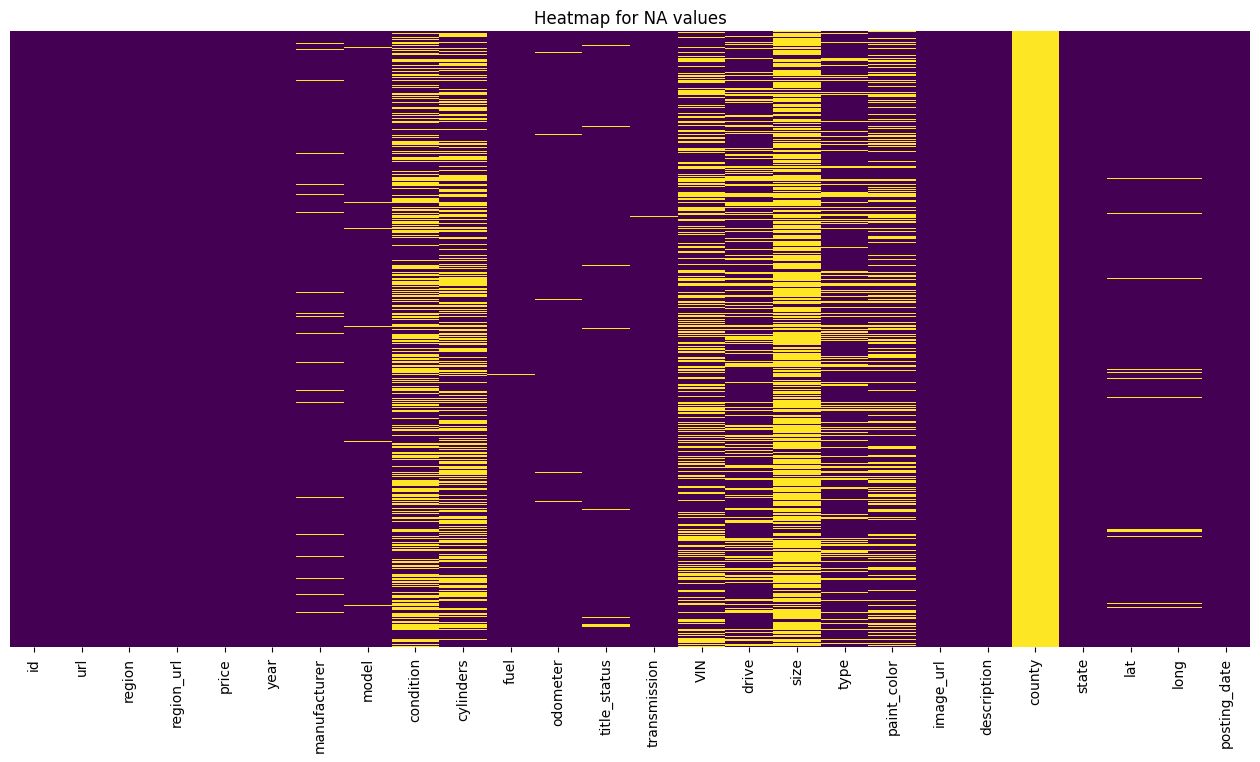

In [32]:
#visualizing the na values

plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap="viridis")
plt.title("Heatmap for NA values")
plt.show()

The heatmap visualization clearly shows the distribution of missing values in the dataset, with yellow bars indicating NA values across different features. A few key columns, such as condition, cylinders, VIN, and size, exhibit a significant amount of missing data. Notably, the county column is entirely yellow, confirming that it is completely missing for all observations. Features like drive, paint_color, and type also have a substantial proportion of missing values, which may impact the analysis. On the other hand, essential columns like id, price, url, and state have no missing values, ensuring they are reliable for analysis

### 3.2 Detect Outliers

In [33]:
#detecting outliers in data

#list of numerical variables
numerical_cols=df[num_features]

#loop through each numerical columns to detect outliers

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1

    #define the bound for ouliers
    lower_bound= Q1 - 1.5*IQR
    upper_bound= Q3 + 1.5*IQR

    #outlier
    outliers=df[(df[col] < lower_bound) | (df[col]> upper_bound)]

We initially had seven numerical variables: id, price, year, odometer, county, lat, and long. After reviewing the data, we identified that the county variable contained only NA values and decided to exclude it. Additionally, the id, lat, and long variables were deemed non-essential for our analysis and were removed as well. This left us with three key numerical variables: price, year, and odometer, which were selected for further exploration and visualization using boxplots to better understand their distribution and detect potential outliers.

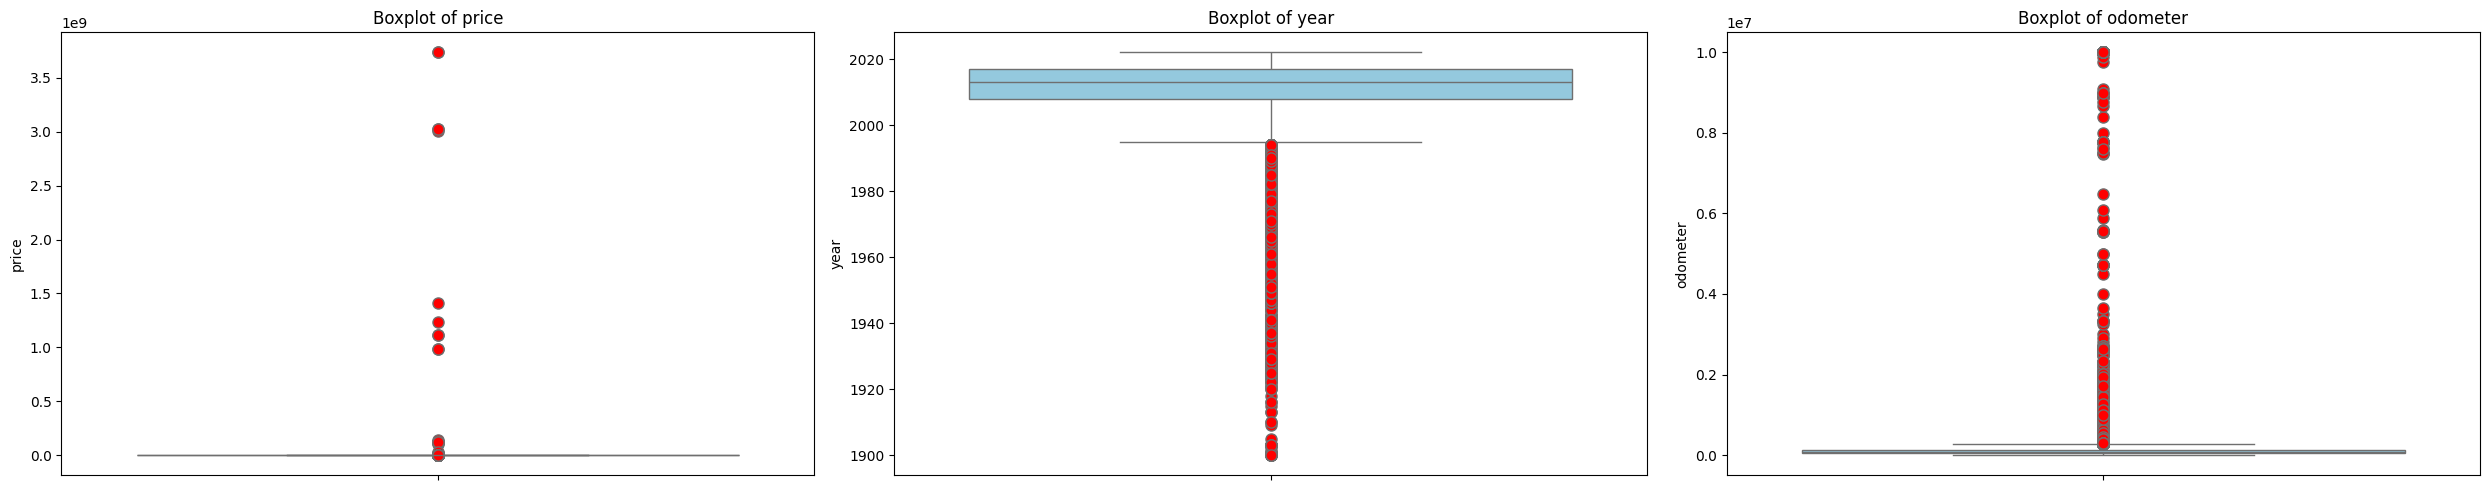

In [34]:
# taking only 3 numerical variables
numerical_cols = ['price', 'year', 'odometer']

# Create a figure with exactly 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))

# Define flier properties for the boxplots
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Loop through each numerical column and corresponding subplot to create a boxplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], color="skyblue", flierprops=flierprops)
    axes[i].set_title(f'Boxplot of {col}')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

The boxplots show how the values for price, year, and odometer are spread out and highlight some unusual points:

- Price: There are a few extremely high prices that don’t look realistic, suggesting possible errors. Most of the car prices are low, which means there’s a big gap between the normal prices and these outliers.

- Year: Most cars were manufactured between 2000 and 2020, with a few much older models that stand out as outliers.

- Odometer: Most cars have low mileage, but there are a few with very high readings, which could be old cars or incorrect data.

### 3.3 Univariate Analysis

Firstly, we'll create a function called "plotting_3_chart" that will create a comprehensive visualization for a single numerical feature using three different types of plots: a Histogram, a QQ Plot, and a Box Plot. This allows us for an easy comparison of the distribution, spread, and presence of outliers in the specified feature. This particular function will be used for other numerical features such as "year" and "odometer" for better understanding of the particular feature.

In [35]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    plt.style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );


#### 3.3.1 Price (Target Variable)

C:\Users\rohit\AppData\Local\Temp\ipykernel_25848\1393780226.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)


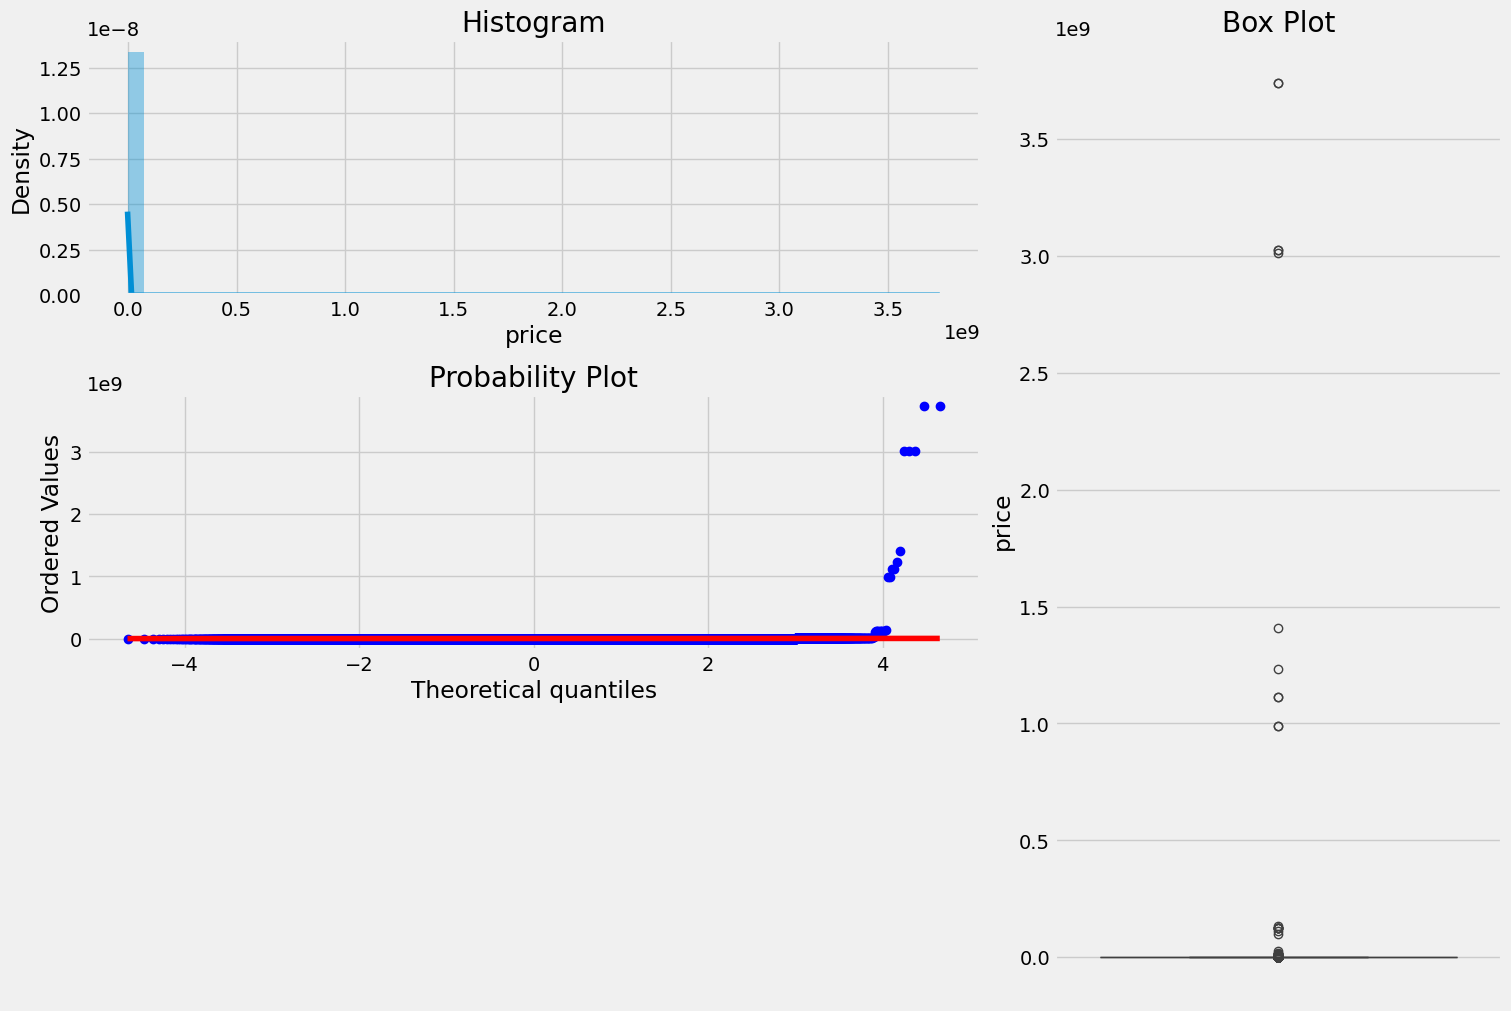

In [36]:
plotting_3_chart(df, "price")

Key Insights:

- The histogram shows that the majority of prices are concentrated near zero, with almost no values in the higher range.
- This distribution is highly right-skewed, as seen by the presence of a few extreme values far from the main cluster.
- The probability plot confirms the heavy skewness by showing that the majority of values deviate significantly from the theoretical quantiles.
- The dots (representing the price values) are not aligned along the straight red line, indicating that the price variable does not follow a normal distribution.
- The box plot reveals the presence of extreme outliers in the price variable. There are many points above the upper whisker, indicating abnormally high values.
- The distribution is compressed towards the lower end, with most values near zero, while a few large values extend far upwards.


This level of skewness and presence of extreme outliers can significantly distort model training and lead to poor performance. Models like linear regression are particularly sensitive to such skewed distributions. Therefore, to make the price variable more normally distributed and to handle these outliers, data transformation techniques like log transformation or capping outliers are required.

#### 3.3.2 Year Variable

C:\Users\rohit\AppData\Local\Temp\ipykernel_25848\1393780226.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)


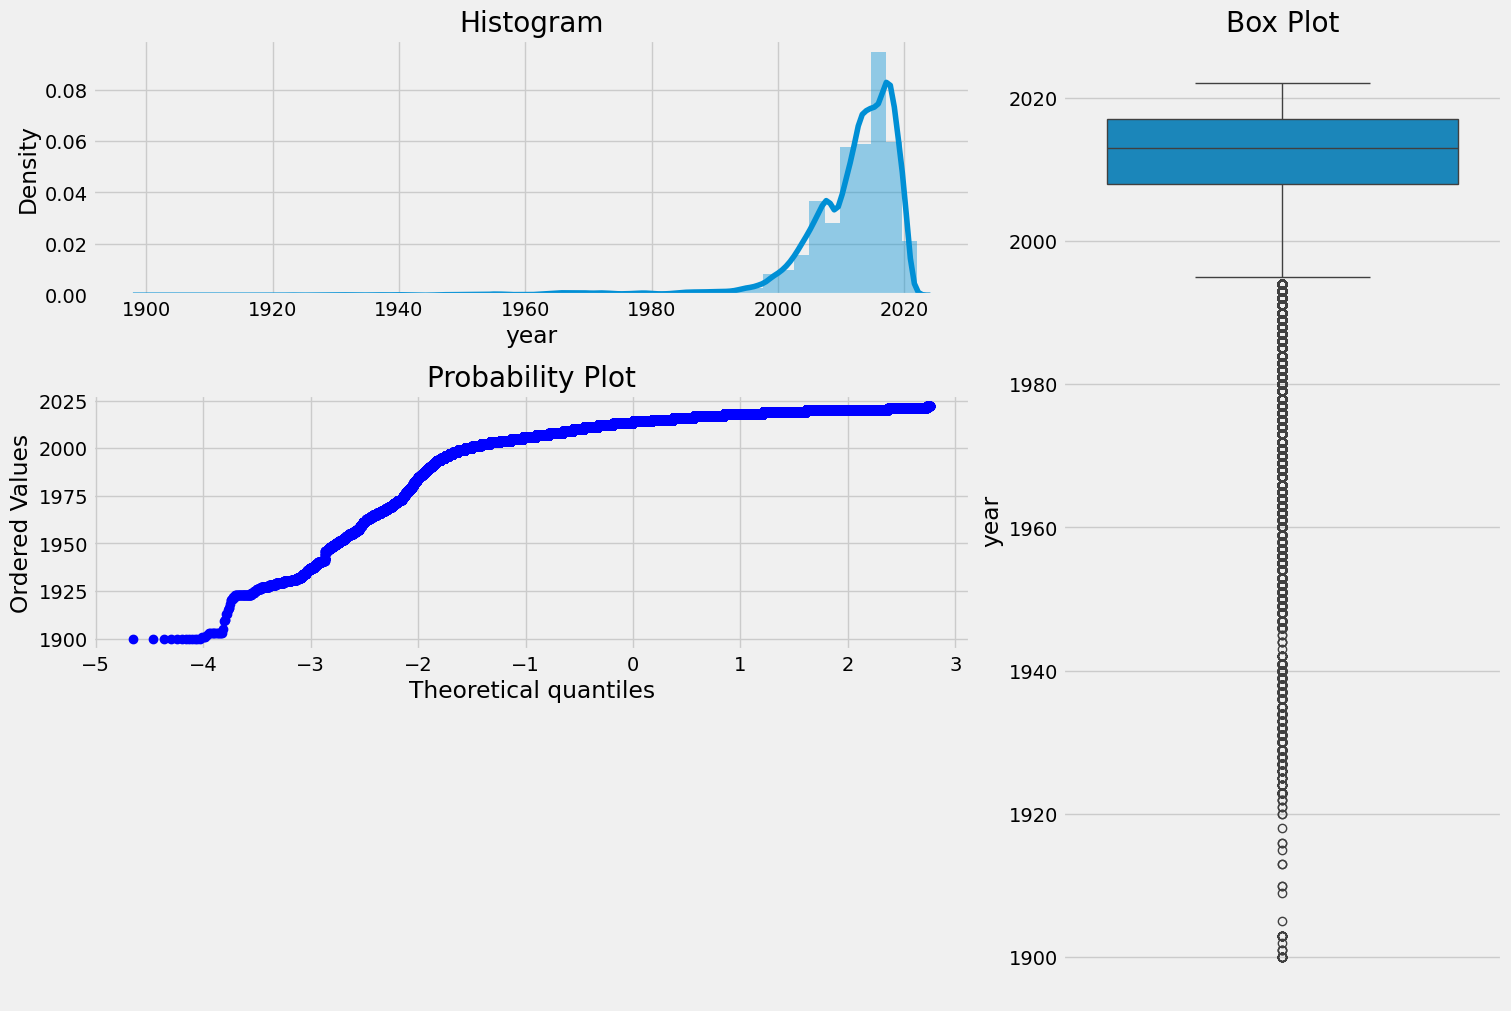

In [37]:
plotting_3_chart(df, 'year')

This visualization shows the distribution of the year variable using three different plots: a histogram, a probability plot, and a box plot.

Histogram: The histogram reveals that most of the cars in the dataset are from recent years, primarily ranging between 2000 and 2020. There is a steep increase in the density starting around 2000, peaking around 2015, and then dropping sharply as it approaches 2020. This suggests that the dataset is heavily skewed towards newer cars, with very few observations for cars manufactured before 1980.

Probability Plot: The probability plot compares the distribution of the year variable to a normal distribution. The pronounced curvature at the lower end (around 1900–1950) and the flattening at the upper end indicate that the year variable deviates significantly from normality. This could suggest that the year data is not symmetrically distributed and contains many extreme outliers, especially for older cars.

Box Plot: The box plot visually confirms the presence of outliers in the year variable, specifically for cars manufactured before 1980. The long lower whisker and the many points outside the main box indicate that a small percentage of cars are much older than the rest. However, for cars manufactured after 1980, there is a more compact and consistent distribution.

#### 3.3.3 Odometer Variable

C:\Users\rohit\AppData\Local\Temp\ipykernel_25848\1393780226.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)


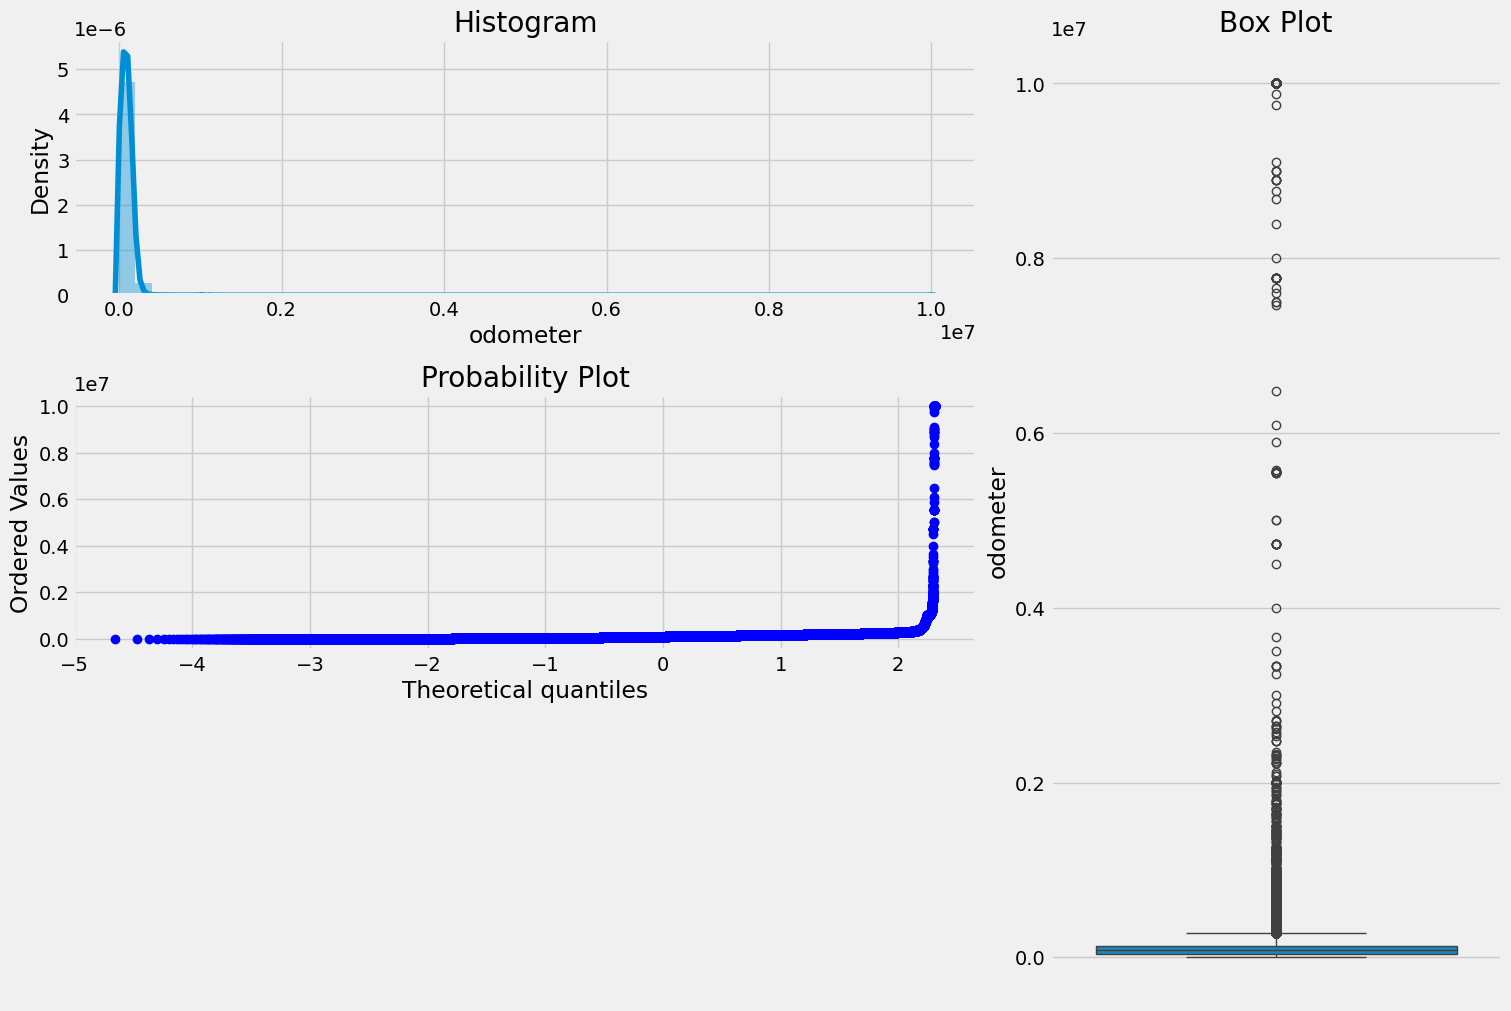

In [38]:
plotting_3_chart(df, 'odometer')

This visualization provides an overview of the distribution of the odometer variable using three different plots: a histogram, a probability plot, and a box plot.

Histogram: The histogram shows that the majority of cars have relatively low odometer readings, indicating that most cars in this dataset have not been driven for very high mileage. There is a very sharp peak near zero and then a steep decline, suggesting a heavily right-skewed distribution. The long tail extending to the right highlights the presence of a small number of cars with exceptionally high odometer values.

Probability Plot: The probability plot compares the distribution of the odometer variable to a theoretical normal distribution. The extreme curvature and upward shift at the right side indicate a strong deviation from normality. This skewness is a clear sign that the variable has many extreme values, making it far from normally distributed. The dots being closely packed near zero and then suddenly rising further confirm this behavior.

Box Plot: The box plot visually confirms the heavy skewness and the presence of numerous outliers in the odometer variable. The box itself is squeezed at the bottom, showing that the central data points (25th to 75th percentile) are clustered tightly at low odometer values. The long whisker and the abundance of points outside the upper range show the presence of many cars with exceptionally high mileage compared to the rest of the dataset.

Key insights:

- There is a noticeable downward trend, indicating that the car price generally decreases as the car age increases.
- For cars aged between 0 to 20 years, the prices are relatively stable and clustered around a certain range, showing less variability compared to older cars.
- After around 20 years, prices start to show a wider spread, suggesting more variation in value based on factors other than age (e.g., condition, brand, vintage appeal.
- There are several points with extremely high prices, which could represent classic cars or luxury models that retain or increase their value over time.

### 3.4 Multivariate Analysis

We will explore graphically, in a 3D scatter plot, the three most important variables interrelated for our multivariable analysis: odometer, year, and price. This 3D plot is created for analyzing how the different variables will interact with each other, which may be difficult to detect in a 2D plot. By mapping odometer to the x-axis, year to the y-axis, and price to the z-axis, we can see how car prices vary with both mileage and the year of manufacture simultaneously. This plot will help us find clusters, outliers, and dependencies between the variables for more detailed analysis on how the mileage and age of a used car influence its price. It also depicts nonlinear relationships and shows regions of high deviation of price, which will guide us in feature selection and further steps of modelling. In general, the 3D scatter plot offers a clear insight into the dynamics of the relationships at hand and helps provide support for the decisions to be made in this analysis.

In [39]:
def plot3D(df):

    fig = plt.figure(figsize=(12,10))
    ax = plt.axes(projection="3d")

    z_points = df['price']
    x_points = df['odometer']
    y_points = df['year']
    ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

    ax.set_xlabel('odometer')
    ax.set_ylabel('year')
    ax.set_zlabel('price')

    plt.show()

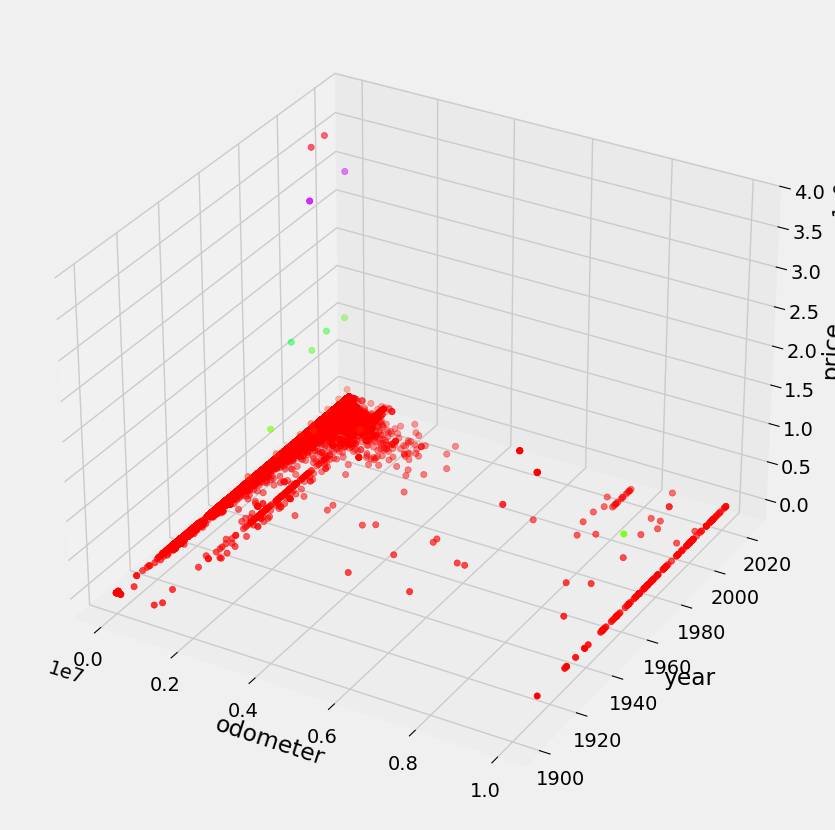

In [40]:
plot3D(df)

Key inssights:

- Most of the cars are clustered at very low price values, regardless of their year or odometer readings, indicating a high number of inexpensive cars in the dataset.
- As odometer readings increases, prices of the car generally remain low, indicating a negative correlation between odometer and price.
- High-mileage cars rarely have high prices, except for a few outliers, potentially representing unique or luxury models.
- Cars that are manufactured before 1980 show scattered prices, with a few significantly high-priced outliers, indicating that vintage cars may have a higher resale value.
- Cars produced post-2000 are mostly low-priced, suggesting a more predictable and narrow price range for modern cars.
- The plot suggests a strong dependency of price on odometer and year, with older and high-mileage cars generally having lower prices. Exceptions are limited to specific, likely rare, vehicle types.



## 4. Feature Engineering and Selection

Feature engineering in data science involves transforming a dataset by adding, removing, combining, or modifying features to enhance machine learning model performance and accuracy. Successful feature engineering relies on a strong understanding of the business context and the data at hand. By creating new features, you gain a deeper comprehension of the data, leading to more meaningful insights.

Feature Selection is the process of reduction of input variable to the model by utilizing only the relevant data and getting rid of the noise in data. It's the process whereby our system automatically chooses relevant features for our machine learning model, based on the type of problem one is trying to solve. We do this by either the inclusion or exclusion of important features without changing them. This helps in cutting down the noise in our data and reducing the size of our input data.

The models in machine learning work on a simple rule: the output depends on whatever you feed in. Garbage in, garbage out—if we are feeding our model garbage, we should expect garbage as output too. In this case, for our data, garbage means noise. We collect enormous amounts of data to train a model and enable the machine to improve by learning from it. Usually, most of the noise is carried in the data collected; some of the columns in our data set may not add much 'value' to the performance of our model. Having a lot of data will slow down the training process and hence the model. 

In [41]:
# Dropping irrelevant features based on domain knowledge, such as URLs, IDs, and unnecessary text fields
irrelevant_features = [
    'id', 'url', 'region', 'region_url', 'description', 'VIN', 
    'image_url', 'posting_date', 'state', 'county', "lat", "long", "model"
]
final_df = df.drop(columns=irrelevant_features)


In [42]:
final_df.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color'],
      dtype='object')

In [43]:
num_features=final_df.select_dtypes(include="number").columns
cat_features=final_df.select_dtypes(exclude="number").columns

print(num_features)
print(cat_features)

Index(['price', 'year', 'odometer'], dtype='object')
Index(['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color'],
      dtype='object')


In the reference paper, the features were selected randomly without a clear strategy, which resulted in low model accuracy because some key variables were likely left out. To improve on this, we implemented a systematic feature selection process to ensure that we captured all the important features that can significantly impact the target variable (price).



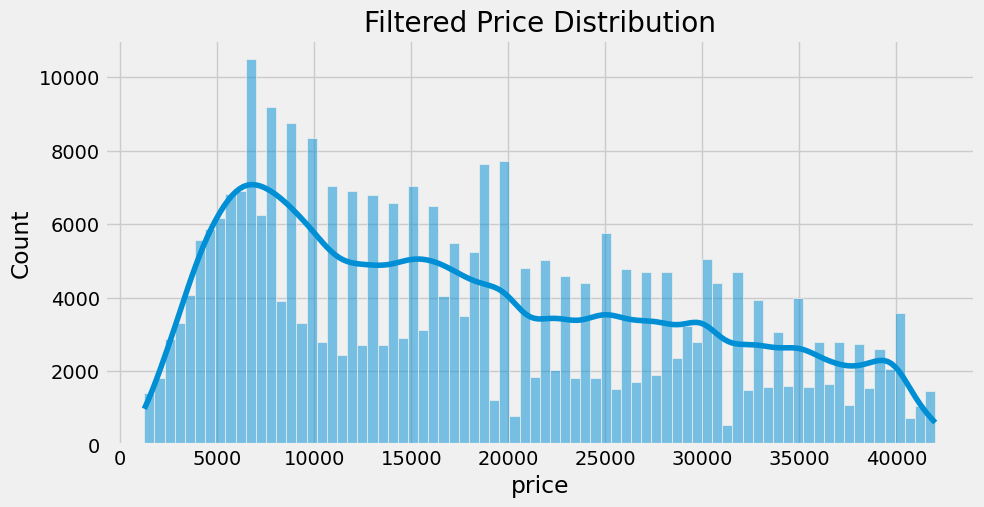

<class 'pandas.core.frame.DataFrame'>
Index: 303932 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   manufacturer  296034 non-null  object 
 1   condition     191256 non-null  object 
 2   cylinders     176611 non-null  object 
 3   fuel          302029 non-null  object 
 4   odometer      303932 non-null  float64
 5   title_status  298729 non-null  object 
 6   transmission  302688 non-null  object 
 7   drive         210823 non-null  object 
 8   size          82091 non-null   object 
 9   type          245201 non-null  object 
 10  paint_color   219983 non-null  object 
 11  car_age       303932 non-null  float64
 12  price_log     303932 non-null  float64
dtypes: float64(3), object(10)
memory usage: 32.5+ MB


In [44]:
# Apply manual filtering for key variables
final_df = final_df[(final_df['price'] >= 1250.00) & (final_df['price'] < 41997.55) & 
                    (final_df['year'] >= 2003) & (final_df['odometer'] <= 208040.4)]

# Create car age as a new feature
final_df['car_age'] = 2024 - final_df['year']

# Visualize the new distribution of filtered price
plt.figure(figsize=(10, 5))
sns.histplot(final_df['price'], kde=True)
plt.title('Filtered Price Distribution')
plt.show()

# Log transformation on the filtered price
final_df['price_log'] = np.log1p(final_df['price'])

# Drop the original 'price' and 'year' columns
final_df = final_df.drop(columns=["price", "year"])

# Check the resulting DataFrame
final_df.info()

Initially, we observed that the target variable price was highly skewed in the univariate analysis, which made it challenging to visualize its distribution. When plotted, almost all values were concentrated near zero, making it difficult for the model to learn patterns effectively. This skewness caused the model’s performance to be poor, with negative accuracy scores. We also reviewed various research papers, and they applied manual filtering techniques on numerical variables, but even after trying similar methods, our model’s accuracy did not improve significantly.We first tried running our model with the original values of the target variable, and the accuracy was very low.

To address this issue, we transformed the price variable by creating a new column, price_log, using the logarithmic transformation. This helped in smoothing the distribution of prices and allowed the model to capture the relationships better. Along with this, we performed additional data preparation steps to refine the dataset further. We filtered the year feature and created a new feature called car_age using the formula: car_age = current_year - year. This was done to capture the effect of a car’s age on its price more accurately.

We also filtered the odometer variable to remove unrealistic values that could distort the predictions. These transformations and filtering steps significantly improved the dataset quality, ensuring that the model could learn meaningful patterns from the data. This comprehensive data preparation strategy was crucial in overcoming the initial issues and enhancing model performance, leading to more reliable and interpretable results.

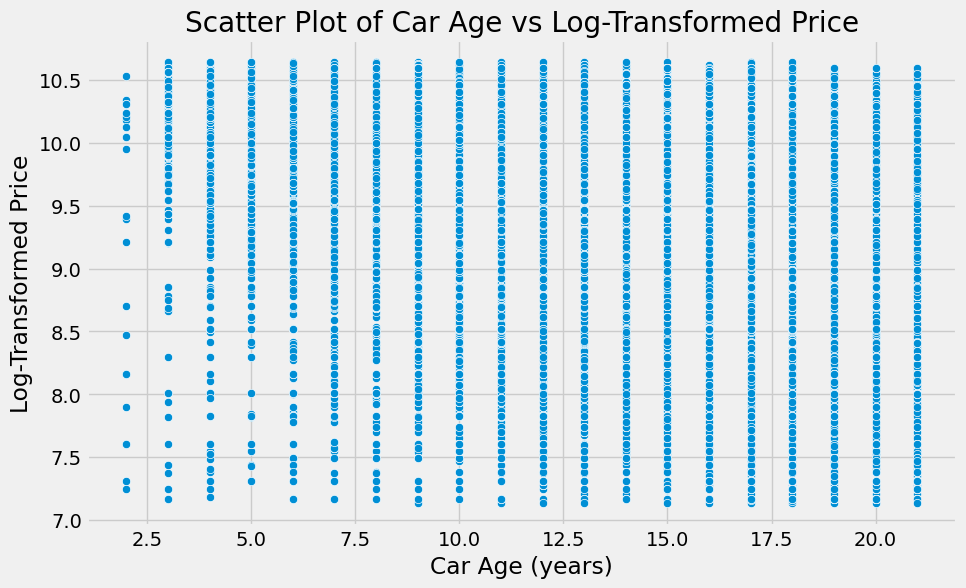

In [45]:
# Scatter plot to visualize the relationship between car_age and price_log
plt.figure(figsize=(10, 6))
sns.scatterplot(x=final_df['car_age'], y=final_df["price_log"])
plt.title("Scatter Plot of Car Age vs Log-Transformed Price")
plt.xlabel("Car Age (years)")
plt.ylabel("Log-Transformed Price")
plt.show()

Key insights:

- The scatter plot depicts the relationship between Car Age (in years) and the Log-Transformed Price of the vehicle.
- As the age of the car increases, the log-transformed price tends to decrease, indicating that older cars generally have a lower value compared to newer ones.
- The data points are evenly distributed across different car ages, suggesting that the dataset has a balanced representation of car ages.
- For cars with ages below 5 years, there is a wider range of prices, but as the car age increases, the range of prices narrows down.

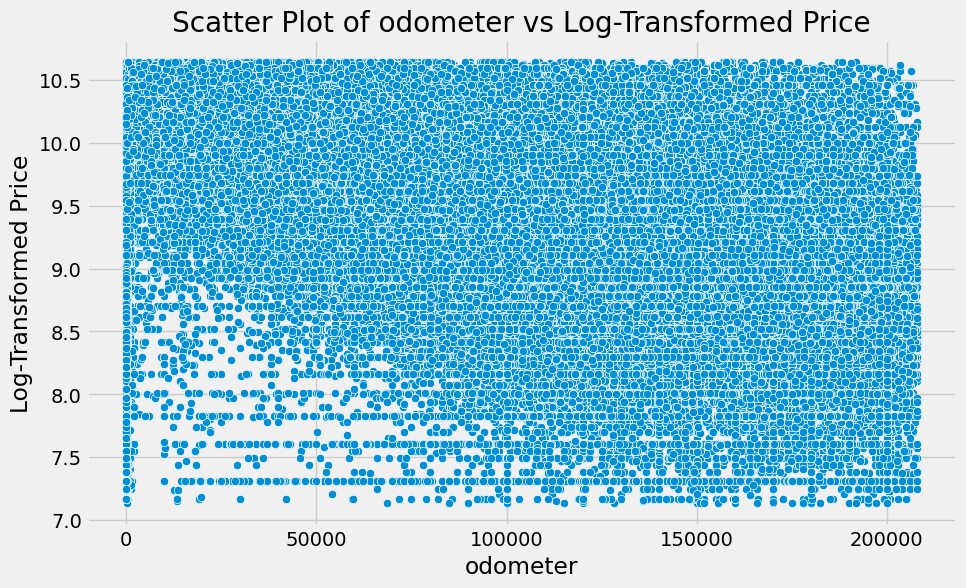

In [46]:
# Scatter plot to visualize the relationship between car_age and price_log
plt.figure(figsize=(10, 6))
sns.scatterplot(x=final_df['odometer'], y=final_df["price_log"])
plt.title("Scatter Plot of odometer vs Log-Transformed Price")
plt.xlabel("odometer")
plt.ylabel("Log-Transformed Price")
plt.show()

Key insights:

- There is a visible trend indicating an inverse relationship between odometer and price_log. As the odometer reading increases, the log-transformed price tends to decrease. This suggests that vehicles with higher mileage generally have lower prices.
- For lower odometer readings (e.g., below 50,000 miles), there is a wider spread of prices. This indicates that cars with lower mileage are valued differently based on other factors such as brand, condition, or age.
- As the odometer readings approach 200,000 miles, the log-transformed price tends to stabilize around lower values, suggesting that extremely high-mileage cars are typically valued similarly, irrespective of small mileage differences.

In [47]:
print(final_df[cat_features].nunique())

manufacturer    41
condition        6
cylinders        8
fuel             5
title_status     6
transmission     3
drive            3
size             4
type            13
paint_color     12
dtype: int64


## 5. Modelling

### 5.1 Split the data 

In [48]:
#decalring our features and target variable
X=final_df.drop(["price_log"], axis=1)
y=final_df["price_log"]

print(X.shape)
print(y.shape)


(303932, 12)
(303932,)


We transformed the price variable using a logarithmic transformation, creating a new variable called price_log in the feature engineering and selection part. This transformation compresses the range of the values, reducing skewness and making the distribution closer to normal. By using price_log as our target variable instead of the original price, we ensure that the model learns from a more balanced and well-behaved distribution, leading to better predictive performance and more reliable results.

In [49]:
print(X.head(3))

   manufacturer condition    cylinders fuel  odometer title_status  \
27          gmc      good  8 cylinders  gas   57923.0        clean   
28    chevrolet      good  8 cylinders  gas   71229.0        clean   
29    chevrolet      good  8 cylinders  gas   19160.0        clean   

   transmission drive size    type paint_color  car_age  
27        other   NaN  NaN  pickup       white     10.0  
28        other   NaN  NaN  pickup        blue     14.0  
29        other   NaN  NaN  pickup         red      4.0  


Data is being splitted into raining and testing sets. The train_test_split function is used to separate the features (X) and target (y) into two parts:

- Training Set (80%): Used to train the model (X_train, y_train).
- Testing Set (20%): Used to evaluate the model’s performance on unseen data (X_test, y_test).

The random_state=0 ensures that the split is consistent every time, making the results reproducible. This split helps us check how well the model generalizes to new, unseen data, avoiding overfitting on the training set. The print statements display the shapes of X_train and X_test to verify the split.

In [50]:

# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print("Shape of X_train and X_test")
X_train.shape, X_test.shape

Shape of X_train and X_test


((243145, 12), (60787, 12))

In [51]:
# print the shape of y_test and y_train
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of y_train: (243145,)
Shape of y_test: (60787,)


### 5.2 Data pre-processing

In [52]:
#checking the numerical and categorical variables

num_features=X.select_dtypes(include="number").columns
cat_features=X.select_dtypes(exclude="number").columns

print(num_features)
print(cat_features)

Index(['odometer', 'car_age'], dtype='object')
Index(['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color'],
      dtype='object')


In [53]:
print(X["drive"].unique())

[nan 'rwd' '4wd' 'fwd']


### 5.2.1 Imputation of missing values in numerical variables

In [54]:
#checking for missing values in train set
print(X_train[num_features].isna().sum())


odometer    0
car_age     0
dtype: int64


In [55]:

#checking for missing values in test set
print(X_test[num_features].isna().sum())

odometer    0
car_age     0
dtype: int64


### 5.2.2 Imputation of missing values in categorical variables

In [56]:
#checking the missing values in of categorical variables in train set
print(X_train[cat_features].isna().sum())

manufacturer      6241
condition        90236
cylinders       101907
fuel              1512
title_status      4159
transmission       996
drive            74588
size            177427
type             46957
paint_color      67068
dtype: int64


In [57]:
#checking the missing values in of categorical variables in test set
print(X_test[cat_features].isnull().sum())

manufacturer     1657
condition       22440
cylinders       25414
fuel              391
title_status     1044
transmission      248
drive           18521
size            44414
type            11774
paint_color     16881
dtype: int64


Now, when we know there are alot of missing values im categorical variable, our  next step is to handle them.  we handled missing values in the categorical features of our dataset using two different imputation strategies based on the nature and distribution of each feature. Imputation was necessary because machine learning models cannot handle missing values directly, and leaving them untreated can lead to errors or biased predictions.

In the reference paper, they chose to remove all rows with missing values, but we decided not to go with this approach because it would have resulted in losing 81% of our data. Such a large loss would have left us with too little information to build an accurate model. Instead, we opted to impute the missing values to preserve as much data as possible.

Additionally, we made sure to apply imputation after splitting the dataset into X_train and X_test. This was done to avoid data leakage, ensuring that the test set remains unseen and independent, just like it would be in a real-world scenario. By doing this, we maintained the integrity of our test data, preventing any unintentional influence from the training data.

Why imputation is required?

- Missing values can cause problems during training because most machine learning algorithms expect complete data. If left unhandled, they can lead to misinterpretations or incomplete patterns, resulting in lower model performance.
- Imputing missing values helps preserve as much information as possible from the dataset. Dropping rows or columns with missing values would reduce the dataset size and might lead to loss of critical information.

Imputation strategy that has been adopted:
 - Features like "cylinders" , "fuel" , "transmission" has been imputed with the most frequent value also called mode.
    - These features tend to have a few common values that dominate the distribution. For example, most cars might have 4 cylinders, use gasoline, and have automatic transmission.
    - Using the most frequent category (mode) is a logical approach because it reflects the majority pattern in the data, ensuring that the imputed value aligns well with the rest of the dataset. 

- All other categorical features that are not in the mode feature list has been imputed with "unknown"
    - Some categorical features may not have a clear "most common" category, or imputing them with the mode could obscure meaningful patterns. For example, features like car_model or color may have many unique values and no strong dominant category.
    - In such cases, using 'Unknown' as a placeholder helps retain the information that the original value was missing, while still allowing the model to treat it as a distinct category.
    - This strategy is useful for features that don’t have an inherent mode or where the mode might not be a good representative value.

In [58]:

# List of categorical features with specific imputation strategies
mode_features = ['cylinders', 'fuel', 'transmission']  # Features to impute with the mode
unknown_features = [feature for feature in cat_features if feature not in mode_features]  # Rest of the features to be imputed with 'Unknown'

# Imputing with mode for selected features
mode_imputer = SimpleImputer(strategy='most_frequent')
X_train[mode_features] = mode_imputer.fit_transform(X_train[mode_features])
X_test[mode_features] = mode_imputer.transform(X_test[mode_features])

# Imputing with 'Unknown' for remaining features
for feature in unknown_features:
    X_train[feature] = X_train[feature].fillna('Unknown')
    X_test[feature] = X_test[feature].fillna('Unknown')

# Display the remaining missing values to verify the imputation
print("Remaining Missing Values After Imputation (Training Set):\n", X_train[cat_features].isnull().sum())
print("Remaining Missing Values After Imputation (Test Set):\n", X_test[cat_features].isnull().sum())


Remaining Missing Values After Imputation (Training Set):
 manufacturer    0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64
Remaining Missing Values After Imputation (Test Set):
 manufacturer    0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64


#### 5.2.3 Engineering outliers in numerical variables

Handling outliers was necessary because extreme values in our data can mess up the model’s predictions. Outliers can cause the model to give too much importance to unusual data points, leading to poor performance on normal cases.nstead of removing the outliers, which could result in loss of useful data, we chose to cap them using the Interquartile Range (IQR) method. By replacing outliers with the calculated upper bounds, we ensured that these values stayed within a reasonable range without completely removing the observations. This way, we retained all rows in our dataset while minimizing the influence of extreme values.

We calculated the outlier bounds using only the X_train data and then applied the same capping to both X_train and X_test. This step was crucial to prevent data leakage, ensuring that the test data remains independent and isn’t influenced by information from the training set.

In [59]:

# Function to replace outliers with maximum values based on the upper bound
def max_value(df_temp, variable, upper_bound):
    return np.where(df_temp[variable] > upper_bound, upper_bound, df_temp[variable])

# Dictionary to hold the calculated upper bounds for each column
cols_with_outliers = {}


# Calculate the IQR for each numerical column and store the upper bounds
for col in num_features:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the upper bound as Q3 + 1.5 * IQR (standard IQR rule)
    upper_bound = Q3 + 1.5 * IQR
    
    # Store the upper bound in the dictionary
    cols_with_outliers[col] = upper_bound

# Apply the upper bounds to cap outliers in both X_train and X_test
for df_temp in [X_train, X_test]:
    for col in cols_with_outliers:
        df_temp[col] = max_value(df_temp, col, cols_with_outliers[col])
 


In [60]:


# Concatenate x_train and x_test
X_combined = pd.concat([X_train, X_test], ignore_index=True)

# Concatenate y_train and y_test, ensuring it aligns correctly
y_combined = pd.concat([y_train, y_test], ignore_index=True)

# Add the target variable back to the combined DataFrame
combined_data = X_combined.copy()
combined_data['price_log'] = y_combined  


sample_data = combined_data.sample(10) 
print(combined_data)


       manufacturer  condition    cylinders    fuel  odometer title_status  \
0             honda    Unknown  4 cylinders     gas   22015.0        clean   
1            toyota    Unknown  6 cylinders     gas   78000.0        clean   
2            subaru       good  4 cylinders     gas  100000.0        clean   
3              ford    Unknown  6 cylinders     gas  144734.0        clean   
4              ford    Unknown  6 cylinders     gas    4527.0        clean   
...             ...        ...          ...     ...       ...          ...   
303927       jaguar    Unknown  6 cylinders     gas   65496.0        clean   
303928         ford   like new  6 cylinders     gas  157000.0        clean   
303929          bmw    Unknown  6 cylinders     gas   97000.0        clean   
303930         ford  excellent  4 cylinders  hybrid  134000.0        clean   
303931      porsche       good  6 cylinders   other   76640.0        clean   

       transmission    drive      size       type paint_color  

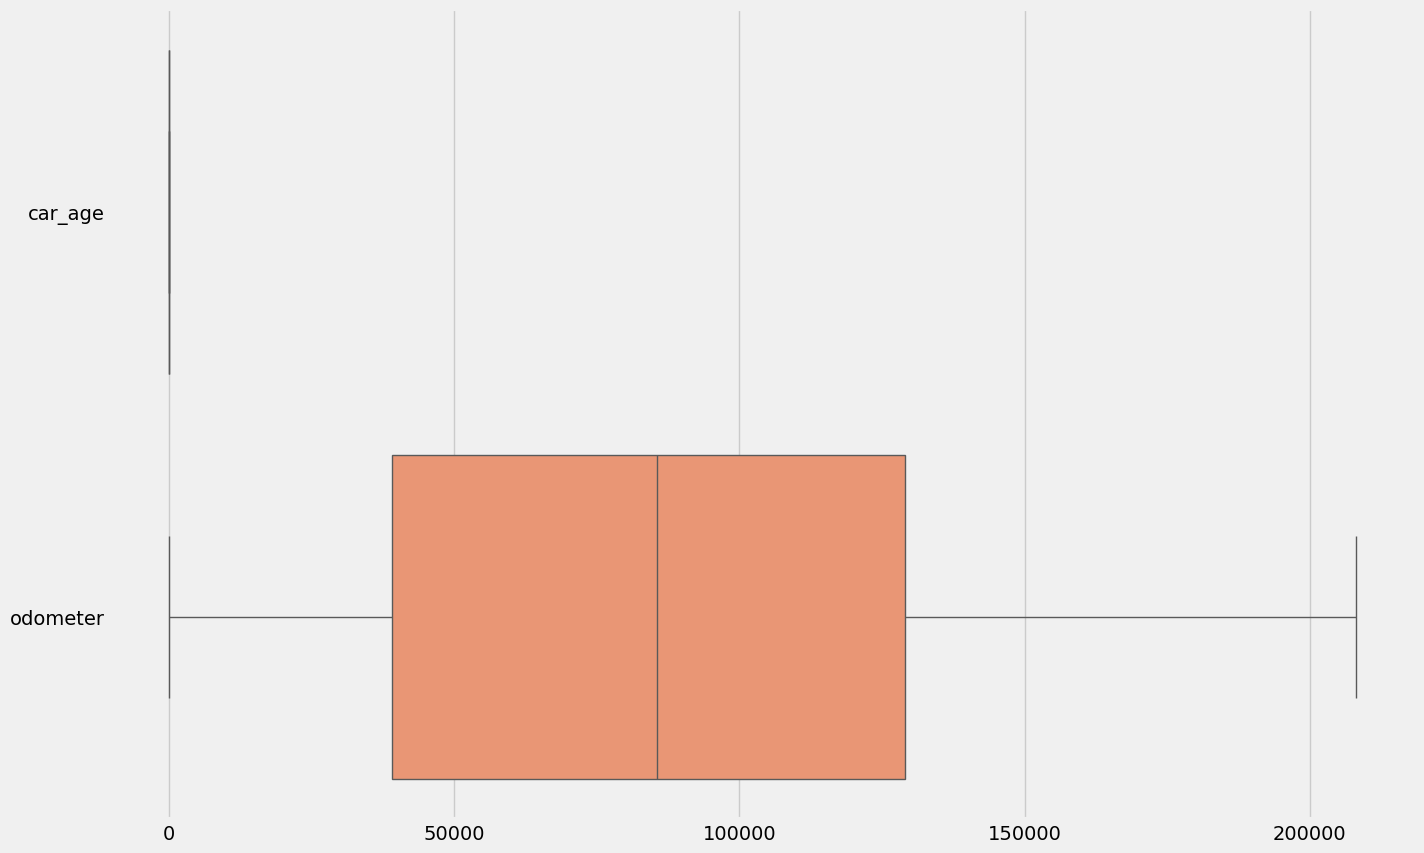

In [61]:
#using seaborn library to plot elegant ones
df_custom = X_train[["car_age","odometer"]]
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=df_custom, orient="h", palette="Set2")

### 5.3 Standardization and Encoding

We applied standardization and encoding to prepare our data for the model to understand it better.

Standardization was used for the numerical features to ensure all values are on a similar scale. Since some columns (like mileage or engine size) might have much larger values compared to others, this can confuse the model and give undue importance to certain features. By standardizing, we made sure that all numerical features have the same range, allowing the model to treat them equally.

For categorical features (like car brands or fuel type), we used Label Encoding to convert them into numerical format. Since models can’t directly interpret text values, we assigned a unique integer to each category. Unlike One-Hot Encoding, Label Encoding replaces each category with a corresponding number, which is simpler and reduces dimensionality. This approach worked well for our dataset because the categorical features had a large number of unique values, and Label Encoding allowed us to retain this information efficiently without creating too many columns

In [62]:

num_features=X.select_dtypes(include="number").columns
cat_features=X.select_dtypes(exclude="number").columns

print(num_features)
print(cat_features)

Index(['odometer', 'car_age'], dtype='object')
Index(['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color'],
      dtype='object')


In [63]:

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [64]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print(X_train.shape, X_test.shape)

(243145, 110) (60787, 110)


### 5.4 Models

1.	Linear Regression: Linear Regresssion is used when two or more variables are thought to be systemtically connected by a llinear relationship. It is a powerful and diverse process for analysing associative ralationships between dependent variables and one or more independent variables.

2.	XGBoost: XGBoost is one of the most famous machine learning methods in boosting model. It has the advantage of efficiency, flexibility and portability. It works under Gradient Boosting framework. It could solve many machine learning problems efficiently and accurately, using parallel tree lift.

3.	Random Forest Regressor: Normally, random forests or random decision forests are used for classification, regression, and other tasks where they construct a multitude of decision trees at training time and output the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees. A random decision forest corrects decision trees' habit of overfitting their training set.

4. K-Neighbors Regressor:  The K-Neighbors Regressor is a simple, yet effective method used for regression tasks. It works by finding the K most similar data points (neighbors) to a given input, based on distance metrics like Euclidean distance. The prediction is made by averaging the target values of these neighboring points.

In [65]:
# Train and evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the model performance
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"{name}: R² = {r2}, RMSE = {rmse}")

Linear Regression: R² = 0.7499463668916067, RMSE = 0.35919953829262197
Random Forest Regressor: R² = 0.885390308080572, RMSE = 0.24318112197486041
XGBRegressor: R² = 0.8288409908037411, RMSE = 0.29717965020917475
K-Neighbors Regressor: R² = 0.8300992464802636, RMSE = 0.2960852943135915


C:\Users\rohit\AppData\Local\Temp\ipykernel_25848\3494837033.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(model_r2_scores.keys()), y=list(model_r2_scores.values()), palette="Blues")


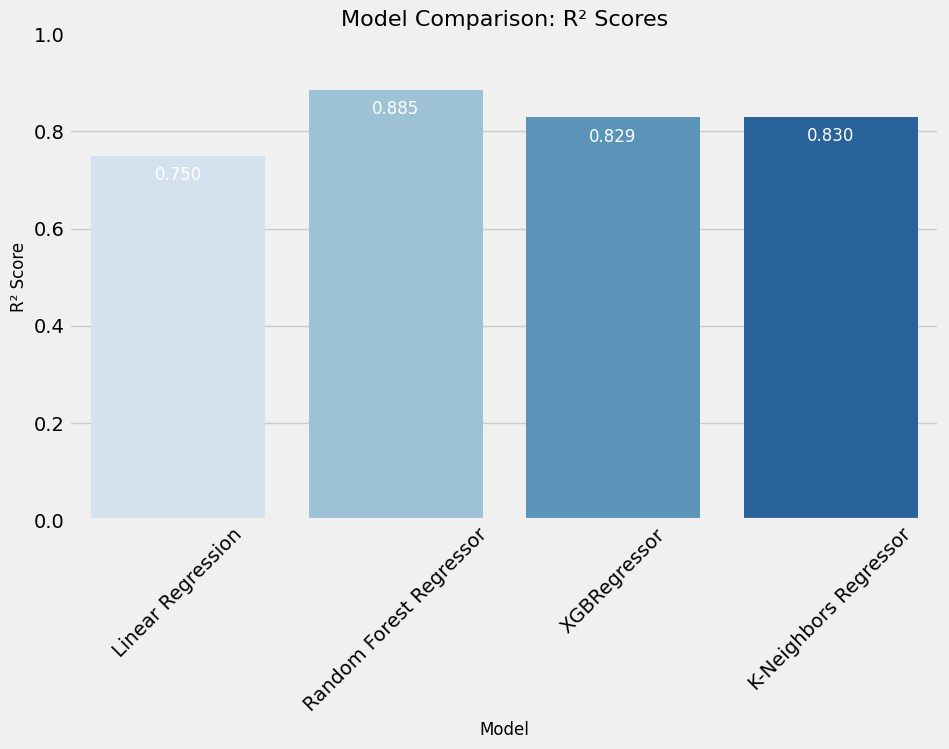

In [66]:
# Store the R² values for each model
model_r2_scores = {
    "Linear Regression": 0.7499463668916067,
    "Random Forest Regressor": 0.8854669907802769,
    "XGBRegressor": 0.8288409908037411,
    "K-Neighbors Regressor": 0.8300992464802636
}

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(model_r2_scores.keys()), y=list(model_r2_scores.values()), palette="Blues")

# Add titles and labels
plt.title('Model Comparison: R² Scores', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.ylim(0, 1)  # Set y-axis limits to focus on R² values
plt.xticks(rotation=45)

# Add R² values inside the bars
for i, value in enumerate(model_r2_scores.values()):
    ax.text(i, value - 0.05, f'{value:.3f}', ha='center', color='white', fontsize=12)

plt.show()

Cross-validation (CV) is a technique used to assess how a machine learning model performs on unseen data by dividing the data into multiple training and validation subsets. It is crucial because it helps detect issues like overfitting or underfitting and provides a more reliable estimate of the model’s generalization performance compared to a single train-test split.

In this code, 3-fold cross-validation is applied to four regression models—Linear Regression, Random Forest Regressor, XGBRegressor, and K-Neighbors Regressor. For each model, the data is split into three parts, with the model being trained on two parts and tested on the remaining one, repeated three times. The R2 scores from each fold are calculated, and the mean and standard deviation are reported to evaluate model performance. Finally, a box plot is used to visualize the variability and stability of each model's R2 scores.


In the code below, we performed model evaluation using a single train-test split to assess the performance of different regression models, including Linear Regression, Random Forest Regressor, XGBRegressor, and K-Neighbors Regressor. First, we fit each model on the training data (X_train_encoded and y_train) and made predictions on both the training and test sets. We calculated common evaluation metrics such as Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and the R2 Score for both sets. This step helped in analyzing whether the models were overfitting or underfitting by comparing their performance on the training data and unseen test data.

After recording and displaying each model’s performance, we created a summary of the R2 scores to see how well each model performed specifically on the test set. Finally, a bar plot was generated to visually compare the R2 scores of all the models on the test set. This comparison helped identify the best-performing model, which can be used for final deployment. This approach provides a direct evaluation of model generalization on unseen data, allowing us to choose the most robust and accurate model for our regression task

In [67]:

# Cross-validation on Random Forest Regressor (baseline)
rf_model = RandomForestRegressor()
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=3, scoring='r2')
print(f"Random Forest Baseline - Cross-Validation R²: Mean = {rf_cv_scores.mean():.3f}, Std Dev = {rf_cv_scores.std():.3f}")

# Cross-validation on K-Neighbors Regressor (baseline)
knn_model = KNeighborsRegressor()
knn_cv_scores = cross_val_score(knn_model, X_train, y_train, cv=3, scoring='r2')
print(f"K-Neighbors Baseline - Cross-Validation R²: Mean = {knn_cv_scores.mean():.3f}, Std Dev = {knn_cv_scores.std():.3f}")


Random Forest Baseline - Cross-Validation R²: Mean = 0.870, Std Dev = 0.002
K-Neighbors Baseline - Cross-Validation R²: Mean = 0.811, Std Dev = 0.002


### 5.5 HyperParameter tuning

In [68]:

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples at each leaf node
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=0)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='r2', n_jobs=-1)

# Fit the grid search on the training data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best R² score for Random Forest: {grid_search_rf.best_score_:.3f}")

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² score for Random Forest: 0.870


Baseline vs Tuned Model Performance:

Before tuning: The baseline model had an R² score of 0.885.
After tuning: The tuned model resulted in an R² score of 0.870, indicating a slight decrease in performance based on cross-validation.

Possible Reasons for decrease in R2:

- Slight Overfitting in Baseline Model: The baseline model, with max_depth=None and no constraints on min_samples_split and min_samples_leaf, may have been slightly overfitting the training data. Tuning the model likely reduced this overfitting, which resulted in a slight decrease in R² but potentially better generalization.

- Regularization Effects: Hyperparameter tuning typically introduces some form of regularization (e.g., limiting splits, controlling tree growth), which helps prevent the model from fitting noise in the data. This regularization can lead to a slight drop in performance on training/validation sets but ensures that the model generalizes better on unseen data.

- Tradeoff Between Bias and Variance: The tuned model likely strikes a better balance between bias (underfitting) and variance (overfitting). A small reduction in R² is often acceptable if it means the model is less likely to overfit.

- Cross-Validation Variability: The slight decrease from 0.885 to 0.870 could simply reflect slight variability in the cross-validation process, especially if different data splits led to different results.

In [69]:
# Define the parameter grid for K-Neighbors Regressor
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']  
}

# Initialize the K-Neighbors Regressor model
knn_model = KNeighborsRegressor()

# Perform GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=3, scoring='r2', n_jobs=-1)

# Fit the grid search on the training data
grid_search_knn.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters for K-Neighbors Regressor: {grid_search_knn.best_params_}")
print(f"Best R² score for K-Neighbors Regressor: {grid_search_knn.best_score_:.3f}")

Best parameters for K-Neighbors Regressor: {'n_neighbors': 11, 'weights': 'distance'}
Best R² score for K-Neighbors Regressor: 0.856


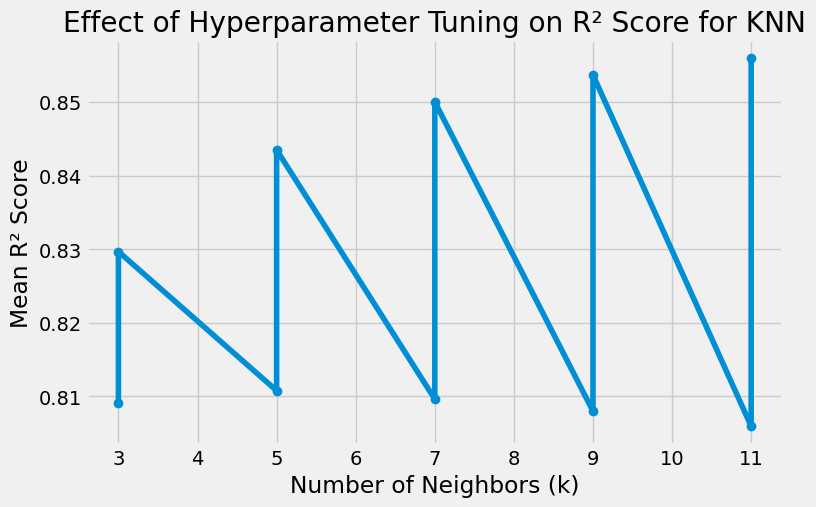

In [70]:
# Extract the results and plot the effect of different `n_neighbors` values on R²
results = grid_search_knn.cv_results_
k_values = [params['n_neighbors'] for params in results['params']]
mean_scores = results['mean_test_score']

plt.figure(figsize=(8, 5))
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean R² Score")
plt.title("Effect of Hyperparameter Tuning on R² Score for KNN")
plt.show()

## 6. Conclusion

In [71]:

# Define the best models (Random Forest and KNN)
best_rf_model = grid_search_rf.best_estimator_ 
best_knn_model = grid_search_knn.best_estimator_  

# Evaluate Random Forest on test set
y_pred_rf = best_rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Final Random Forest - R²: {r2_rf:.3f}, RMSE: {rmse_rf:.3f}")

# Evaluate KNN on test set
y_pred_knn = best_knn_model.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f"Final K-Neighbors Regressor - R²: {r2_knn:.3f}, RMSE: {rmse_knn:.3f}")

Final Random Forest - R²: 0.886, RMSE: 0.243
Final K-Neighbors Regressor - R²: 0.872, RMSE: 0.257


#### Residual plot for knn

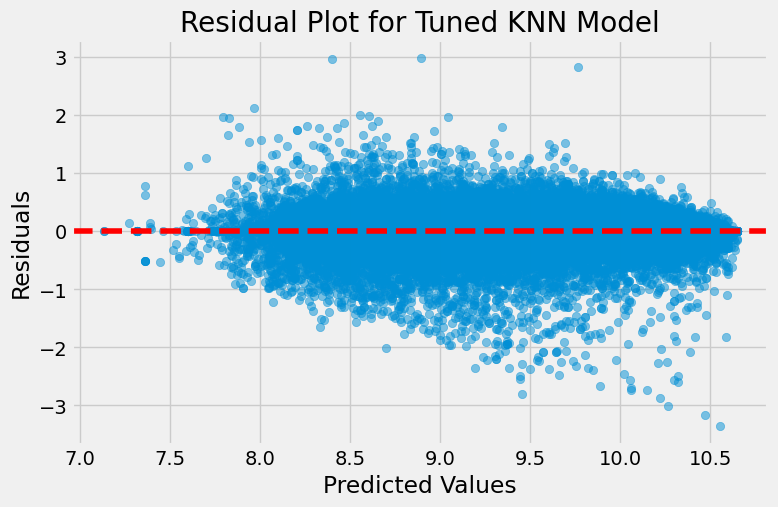

In [72]:
# Calculate residuals
residuals = y_test - y_pred_knn

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Tuned KNN Model")
plt.show()

#### Residual plot for Final Random FOrest model 

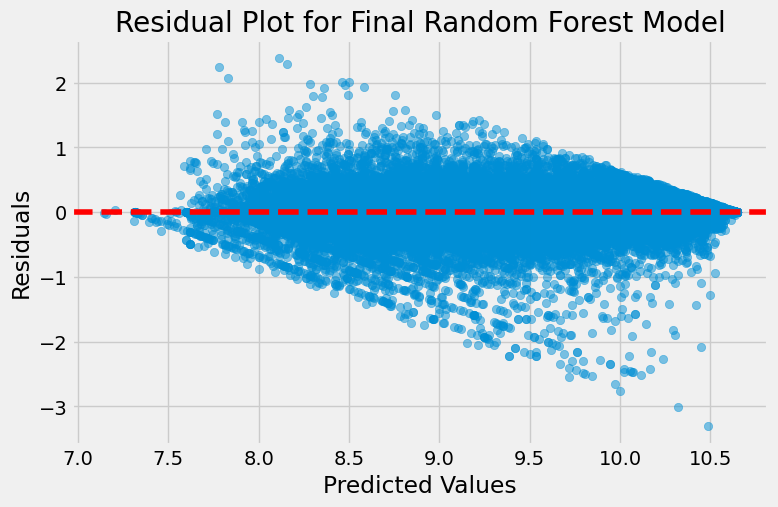

In [73]:
y_pred_rf = best_rf_model.predict(X_test)
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Final Random Forest Model")
plt.show()


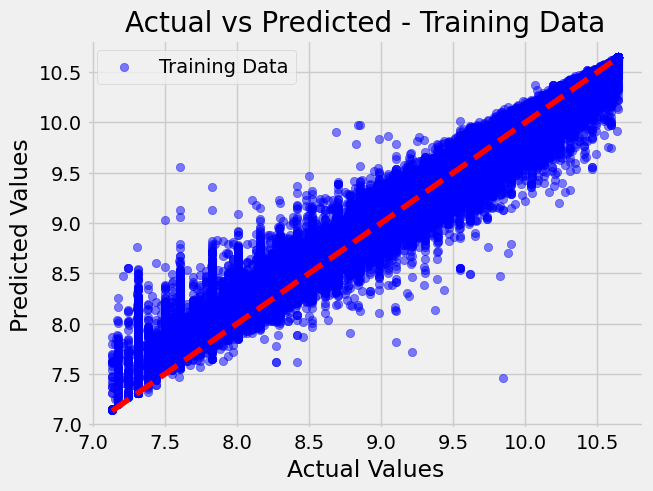

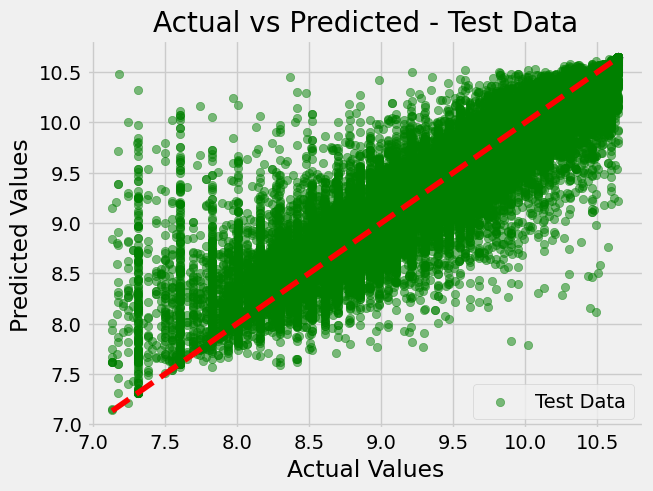

In [76]:

# Predictions on training data
y_train_pred = best_rf_model.predict(X_train)

# Predictions on test data
y_test_pred = best_rf_model.predict(X_test)

# Plot Actual vs Predicted for Training Data
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Training Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--') 
plt.title('Actual vs Predicted - Training Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Plot Actual vs Predicted for Test Data
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5, label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  
plt.title('Actual vs Predicted - Test Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [77]:
# Combine training and test datasets
X_full_train = np.concatenate([X_train, X_test], axis=0)
y_full_train = np.concatenate([y_train, y_test], axis=0)

# Train the final model on the entire dataset with the best parameters
final_rf_model = RandomForestRegressor(**grid_search_rf.best_params_, random_state=0)
final_rf_model.fit(X_full_train, y_full_train)

# The model is now trained on the entire dataset

RandomForestRegressor(n_estimators=200, random_state=0)

#### Feature Importance for Final Random Forest

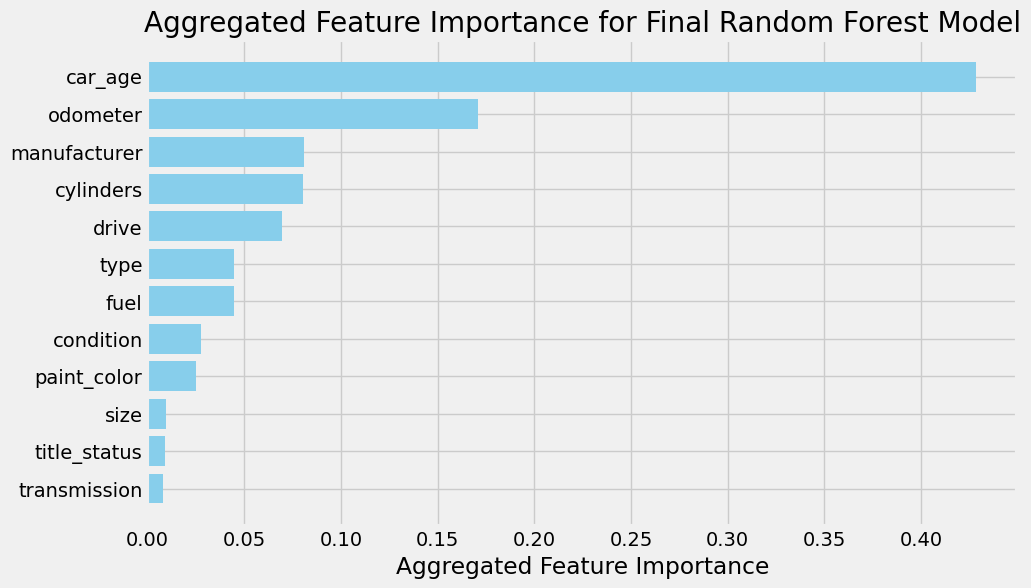

In [89]:
# retrieve feature names after transformation
feature_names = preprocessor.get_feature_names_out()
feature_importances = final_rf_model.feature_importances_

# create a DataFrame with feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# mapping encoded feature names to original feature names
feature_importance_df['Original Feature'] = feature_importance_df['Feature'].str.extract(r'(odometer|car_age|manufacturer|condition|cylinders|fuel|title_status|transmission|drive|size|type|paint_color)', expand=False)

# Group by original feature name and sum the importance
aggregated_importances = feature_importance_df.groupby('Original Feature')['Importance'].sum().reset_index()

# Sort by aggregated importance
aggregated_importances = aggregated_importances.sort_values(by='Importance', ascending=False)

# Plotting the aggregated feature importances
plt.figure(figsize=(10, 6))
plt.barh(aggregated_importances['Original Feature'], aggregated_importances['Importance'], color='skyblue')
plt.xlabel('Aggregated Feature Importance')
plt.title('Aggregated Feature Importance for Final Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

## 7. Save the model

In [78]:

# Save the entire preprocessor (includes both encoder and scaler)
joblib.dump(preprocessor, 'preprocessor.pkl')

print("Preprocessor (encoder + scaler) saved successfully!")

Preprocessor (encoder + scaler) saved successfully!


In [82]:
#save the best final random forest model
joblib.dump(final_rf_model, "final_random_forest_model.pkl")

['final_random_forest_model.pkl']


## 8. References

1. Radwan, I. (n.d.). *Feature Engineering for Logistic Regression*. GitHub. Available at: [https://github.com/ibrahim-radwan/DSTS/blob/main/feature_engineering_logistic_reg.ipynb](https://github.com/ibrahim-radwan/DSTS/blob/main/feature_engineering_logistic_reg.ipynb)

2. Baral, R. (n.d.). *DSTS_sem3*. GitHub. Available at: [https://github.com/baralrohit/DSTS_sem3](https://github.com/baralrohit/DSTS_sem3)

3. Hassan, A. (n.d.). *Navigating the Used Car Marketplace*. Kaggle. Available at: [https://www.kaggle.com/code/abdalrahmanhassan/navigating-the-used-car-marketplace](https://www.kaggle.com/code/abdalrahmanhassan/navigating-the-used-car-marketplace)

4. Mokin, V. (n.d.). *Used Cars Analysis and Prediction*. Kaggle. Available at: [https://www.kaggle.com/code/vbmokin/used-cars-analysis-and-prediction#2.-Download-dataset-](https://www.kaggle.com/code/vbmokin/used-cars-analysis-and-prediction#2.-Download-dataset-)

5. Mokin, V. (n.d.). *Used Cars Price Prediction by 15 Models*. Kaggle. Available at: [https://www.kaggle.com/code/vbmokin/used-cars-price-prediction-by-15-models#5.-Tuning-models-and-test-for-all-features-](https://www.kaggle.com/code/vbmokin/used-cars-price-prediction-by-15-models#5.-Tuning-models-and-test-for-all-features-)

6. Krishnaik, S. (n.d.). *Boston House Pricing*. GitHub. Available at: [https://github.com/krishnaik06/bostonhousepricing](https://github.com/krishnaik06/bostonhousepricing)

7. Krishnaik, S. (n.d.). *Machine Learning Project*. GitHub. Available at: [https://github.com/krishnaik06/mlproject](https://github.com/krishnaik06/mlproject)

8. Simplilearn. (n.d.). *Feature Selection in Machine Learning*. Available at: [https://www.simplilearn.com/tutorials/machine-learning-tutorial/feature-selection-in-machine-learning#why_feature_selection](https://www.simplilearn.com/tutorials/machine-learning-tutorial/feature-selection-in-machine-learning#why_feature_selection)
